# Pupil Metrics Analysis

This notebook demonstrates computing various pupil response metrics:
- PLR (Pupillary Light Reflex) metrics
- PIPR (Post-Illumination Pupil Response) metrics
- Baseline measurements
- Peak constriction analysis

In [1]:
# Import necessary libraries
import numpy as np
from matplotlib import pyplot as plt
import pypipr

In [2]:
# Load sample data
pm = pypipr.load_simulated_pupil()
# Basic metrics computation
peak_constriction = pypipr.pupil_metrics.peak_constriction(pm)
time_to_peak = pypipr.pupil_metrics.time_to_peak(pm)
time_of_peak = time_to_peak + pm.get_light_stimulus().get_time()[0]
print(f"Peak Constriction: {peak_constriction:.2f} mm")
print(f'Time to reach peak constriction: {time_to_peak:.2f} s')
print(f'Time of peak constriction: {time_of_peak:.2f} s')

fig, ax = plt.subplots(1, 1, figsize=(10, 2), sharex=True)
pm.plot(ax=ax, label='Pupil Size', color='blue')
pm.plot_light_stimulus(ax=ax, color='yellow', alpha=0.3)
ax.scatter(time_of_peak, peak_constriction, color="red", label="Peak Constriction", s=30)
ax.legend()



Peak Constriction: 4.01 mm
Time to reach peak constriction: 0.93 s
Time of peak constriction: -0.07 s


C:\Users\20182727\OneDrive - TU Eindhoven\Documents\Tools\pypipr_package\pypipr\analysis\pupil_metrics.py:152: UserWarning: The peak constriction function assumes the size is already relative to the baseline.
  warnings.warn(


In [3]:
# Load sample data
pm = pypipr.load_simulated_pupil()
# Average size
# The average size can be determined from the pupil size data.
average_size_6s = pypipr.pupil_metrics.get_average_size(pm, start_time=5.5, end_time=6.5)
print(f"Average pupil size at 6 seconds post-stimulus: {average_size_6s:.2f} mm")
# Getting the 6s-pipr is very similar to getting the average size, but uses predefined time windows.
pipr_6s = pypipr.pupil_metrics.pipr_6s(pm)
print(f"6s-PIPR: {pipr_6s:.2f} mm")

# Visualization
fig, ax = plt.subplots(2, 1, figsize=(10, 2), sharex=True)

pm.plot(ax=ax[0], label="Pupil Size", color="blue")
pm.plot(ax=ax[1], label="Pupil Size", color="blue")

pm.plot_light_stimulus(ax=ax[0], color="yellow", alpha=0.3)
pm.plot_light_stimulus(ax=ax[1], color="yellow", alpha=0.3)

ax[0].scatter(
    6,
    average_size_6s,
    color="red",
    label=f"Average Size at 6s: {average_size_6s:.2f} mm",
    s=30,
)
ax[1].scatter(6, pipr_6s, color="green", label=f"6s-PIPR: {pipr_6s:.2f} mm", s=30)

ax[0].legend()
ax[1].legend()


Average pupil size at 6 seconds post-stimulus: 6.57 mm
6s-PIPR: 6.57 mm


PIPR at 2 seconds post-stimulus: 5.26 mm
PIPR at 6 seconds post-stimulus: 6.57 mm
PIPR at 8 seconds post-stimulus: 6.99 mm
Average pupil size at 2 seconds: 4.14 mm
Average pupil size at 6 seconds: 6.11 mm
Average pupil size at 8 seconds: 6.57 mm


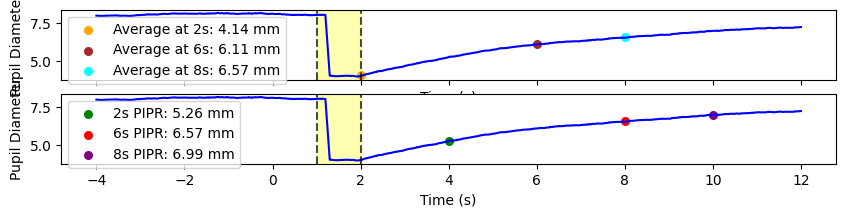

In [4]:
# Let's create a pupil measurement where the light stimulus is from 1 to 2 seconds.
pm = pypipr.load_simulated_pupil()
pm.set_time_offset(2.0)  # Shift time so stimulus starts at 1s
pm.set_light_stimulus(1.0, 2.0)




# The PIPR calculations remain the same, it takes the stimulus into account. 
# Now let's calculate the PIPR at 2, 6, and 8 seconds post-stimulus.

# There is a short hand for the 6s pipr.
pipr_6s = pypipr.pupil_metrics.pipr_6s(pm)
# Other times need to be manually defined.
pipr_2s = pypipr.pupil_metrics.pipr_xs(pm, start=1.5, end=2.5)
pipr_8s = pypipr.pupil_metrics.pipr_xs(pm, start=7.5, end=8.5)

print(f"PIPR at 2 seconds post-stimulus: {pipr_2s:.2f} mm")
print(f"PIPR at 6 seconds post-stimulus: {pipr_6s:.2f} mm")
print(f"PIPR at 8 seconds post-stimulus: {pipr_8s:.2f} mm")


# The average is different now that the stimulus timing has changed.
average_2s = pypipr.pupil_metrics.get_average_size(pm, start_time=1.5, end_time=2.5)
average_6s = pypipr.pupil_metrics.get_average_size(pm, start_time=5.5, end_time=6.5)
average_8s = pypipr.pupil_metrics.get_average_size(pm, start_time=7.5, end_time=8.5)
print(f"Average pupil size at 2 seconds: {average_2s:.2f} mm")
print(f"Average pupil size at 6 seconds: {average_6s:.2f} mm")
print(f"Average pupil size at 8 seconds: {average_8s:.2f} mm")


fig, ax = plt.subplots(2, 1, figsize=(10, 2), sharex=True)
pm.plot(ax=ax[0], label="_", color="blue")
pm.plot(ax=ax[1], label="_", color="blue")
pm.plot_light_stimulus(ax=ax[0], color="yellow", alpha=0.3, label='_')
pm.plot_light_stimulus(ax=ax[1], color="yellow", alpha=0.3, label='_')

ax[0].scatter(2, average_2s, color="orange", label=f"Average at 2s: {average_2s:.2f} mm", s=30)
ax[0].scatter(6, average_6s, color="brown", label=f"Average at 6s: {average_6s:.2f} mm", s=30)
ax[0].scatter(8, average_8s, color="cyan", label=f"Average at 8s: {average_8s:.2f} mm", s=30)

ax[1].scatter(4, pipr_2s, color="green", label=f"2s PIPR: {pipr_2s:.2f} mm", s=30)
ax[1].scatter(8, pipr_6s, color="red", label=f"6s PIPR: {pipr_6s:.2f} mm", s=30)
ax[1].scatter(10, pipr_8s, color="purple", label=f"8s PIPR: {pipr_8s:.2f} mm", s=30)

ax[0].legend()
ax[1].legend()
